In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
##Load dataset paths
DATA_DIR = "../data/raw/images"
crack_dir = os.path.join(DATA_DIR, "Positive")
no_crack_dir = os.path.join(DATA_DIR, "Negative")

print("Crack images:", len(os.listdir(crack_dir)))
print("No Crack images:", len(os.listdir(no_crack_dir)))

Crack images: 20000
No Crack images: 20000


In [6]:
os.listdir(crack_dir)[:5]

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']

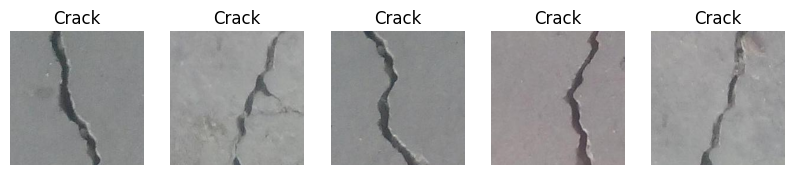

In [8]:
## Visualize samples
import random

def show_samples(folder, label):
    images = os.listdir(folder)[:5]
    plt.figure(figsize=(10,3))
    for i, img in enumerate(images):
        path = os.path.join(folder, img)
        plt.subplot(1,5,i+1)
        plt.imshow(Image.open(path))
        plt.title(label)
        plt.axis("off")
    plt.show()

show_samples(crack_dir, "Crack")

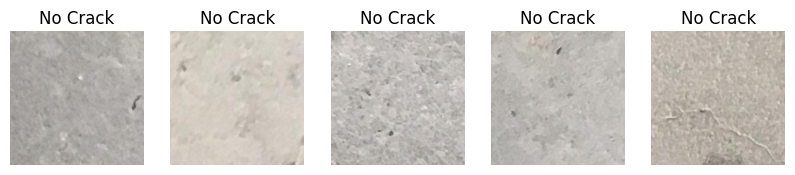

In [9]:
show_samples(no_crack_dir, "No Crack")

In [10]:
## Create DataFrame
data = []

for img in os.listdir(crack_dir):
    data.append([os.path.join(crack_dir, img), 1])

for img in os.listdir(no_crack_dir):
    data.append([os.path.join(no_crack_dir, img), 0])

df = pd.DataFrame(data, columns=["path", "label"])
df.head()

,path,label
0,../data/raw/images\Positive\00001.jpg,1
1,../data/raw/images\Positive\00002.jpg,1
2,../data/raw/images\Positive\00003.jpg,1
3,../data/raw/images\Positive\00004.jpg,1
4,../data/raw/images\Positive\00005.jpg,1


In [11]:
df.tail()

,path,label
39995,../data/raw/images\Negative\19996.jpg,0
39996,../data/raw/images\Negative\19997.jpg,0
39997,../data/raw/images\Negative\19998.jpg,0
39998,../data/raw/images\Negative\19999.jpg,0
39999,../data/raw/images\Negative\20000.jpg,0


In [15]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

In [14]:
df.label.value_counts()

label
1    20000
0    20000
Name: count, dtype: int64

In [17]:
train_df.shape

(32000, 2)

In [20]:
# Save train/val splits for later
SPLIT_DIR = "../data/processed/splits"
import os
os.makedirs(SPLIT_DIR, exist_ok=True)
train_df.to_csv(os.path.join(SPLIT_DIR, "train.csv"), index=False)
val_df.to_csv(os.path.join(SPLIT_DIR, "val.csv"), index=False)